In [ ]:
!pip install geneticalgorithm2 --quiet

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from geneticalgorithm2 import geneticalgorithm2 as ga

In [ ]:
# Dounload dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

#Convert to DataFrame for convenience
df = pd.DataFrame(X, columns=feature_names)
df['target']=y

print('Data dimensionality', df.shape)
df.head(10)

Data dimensionality (569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

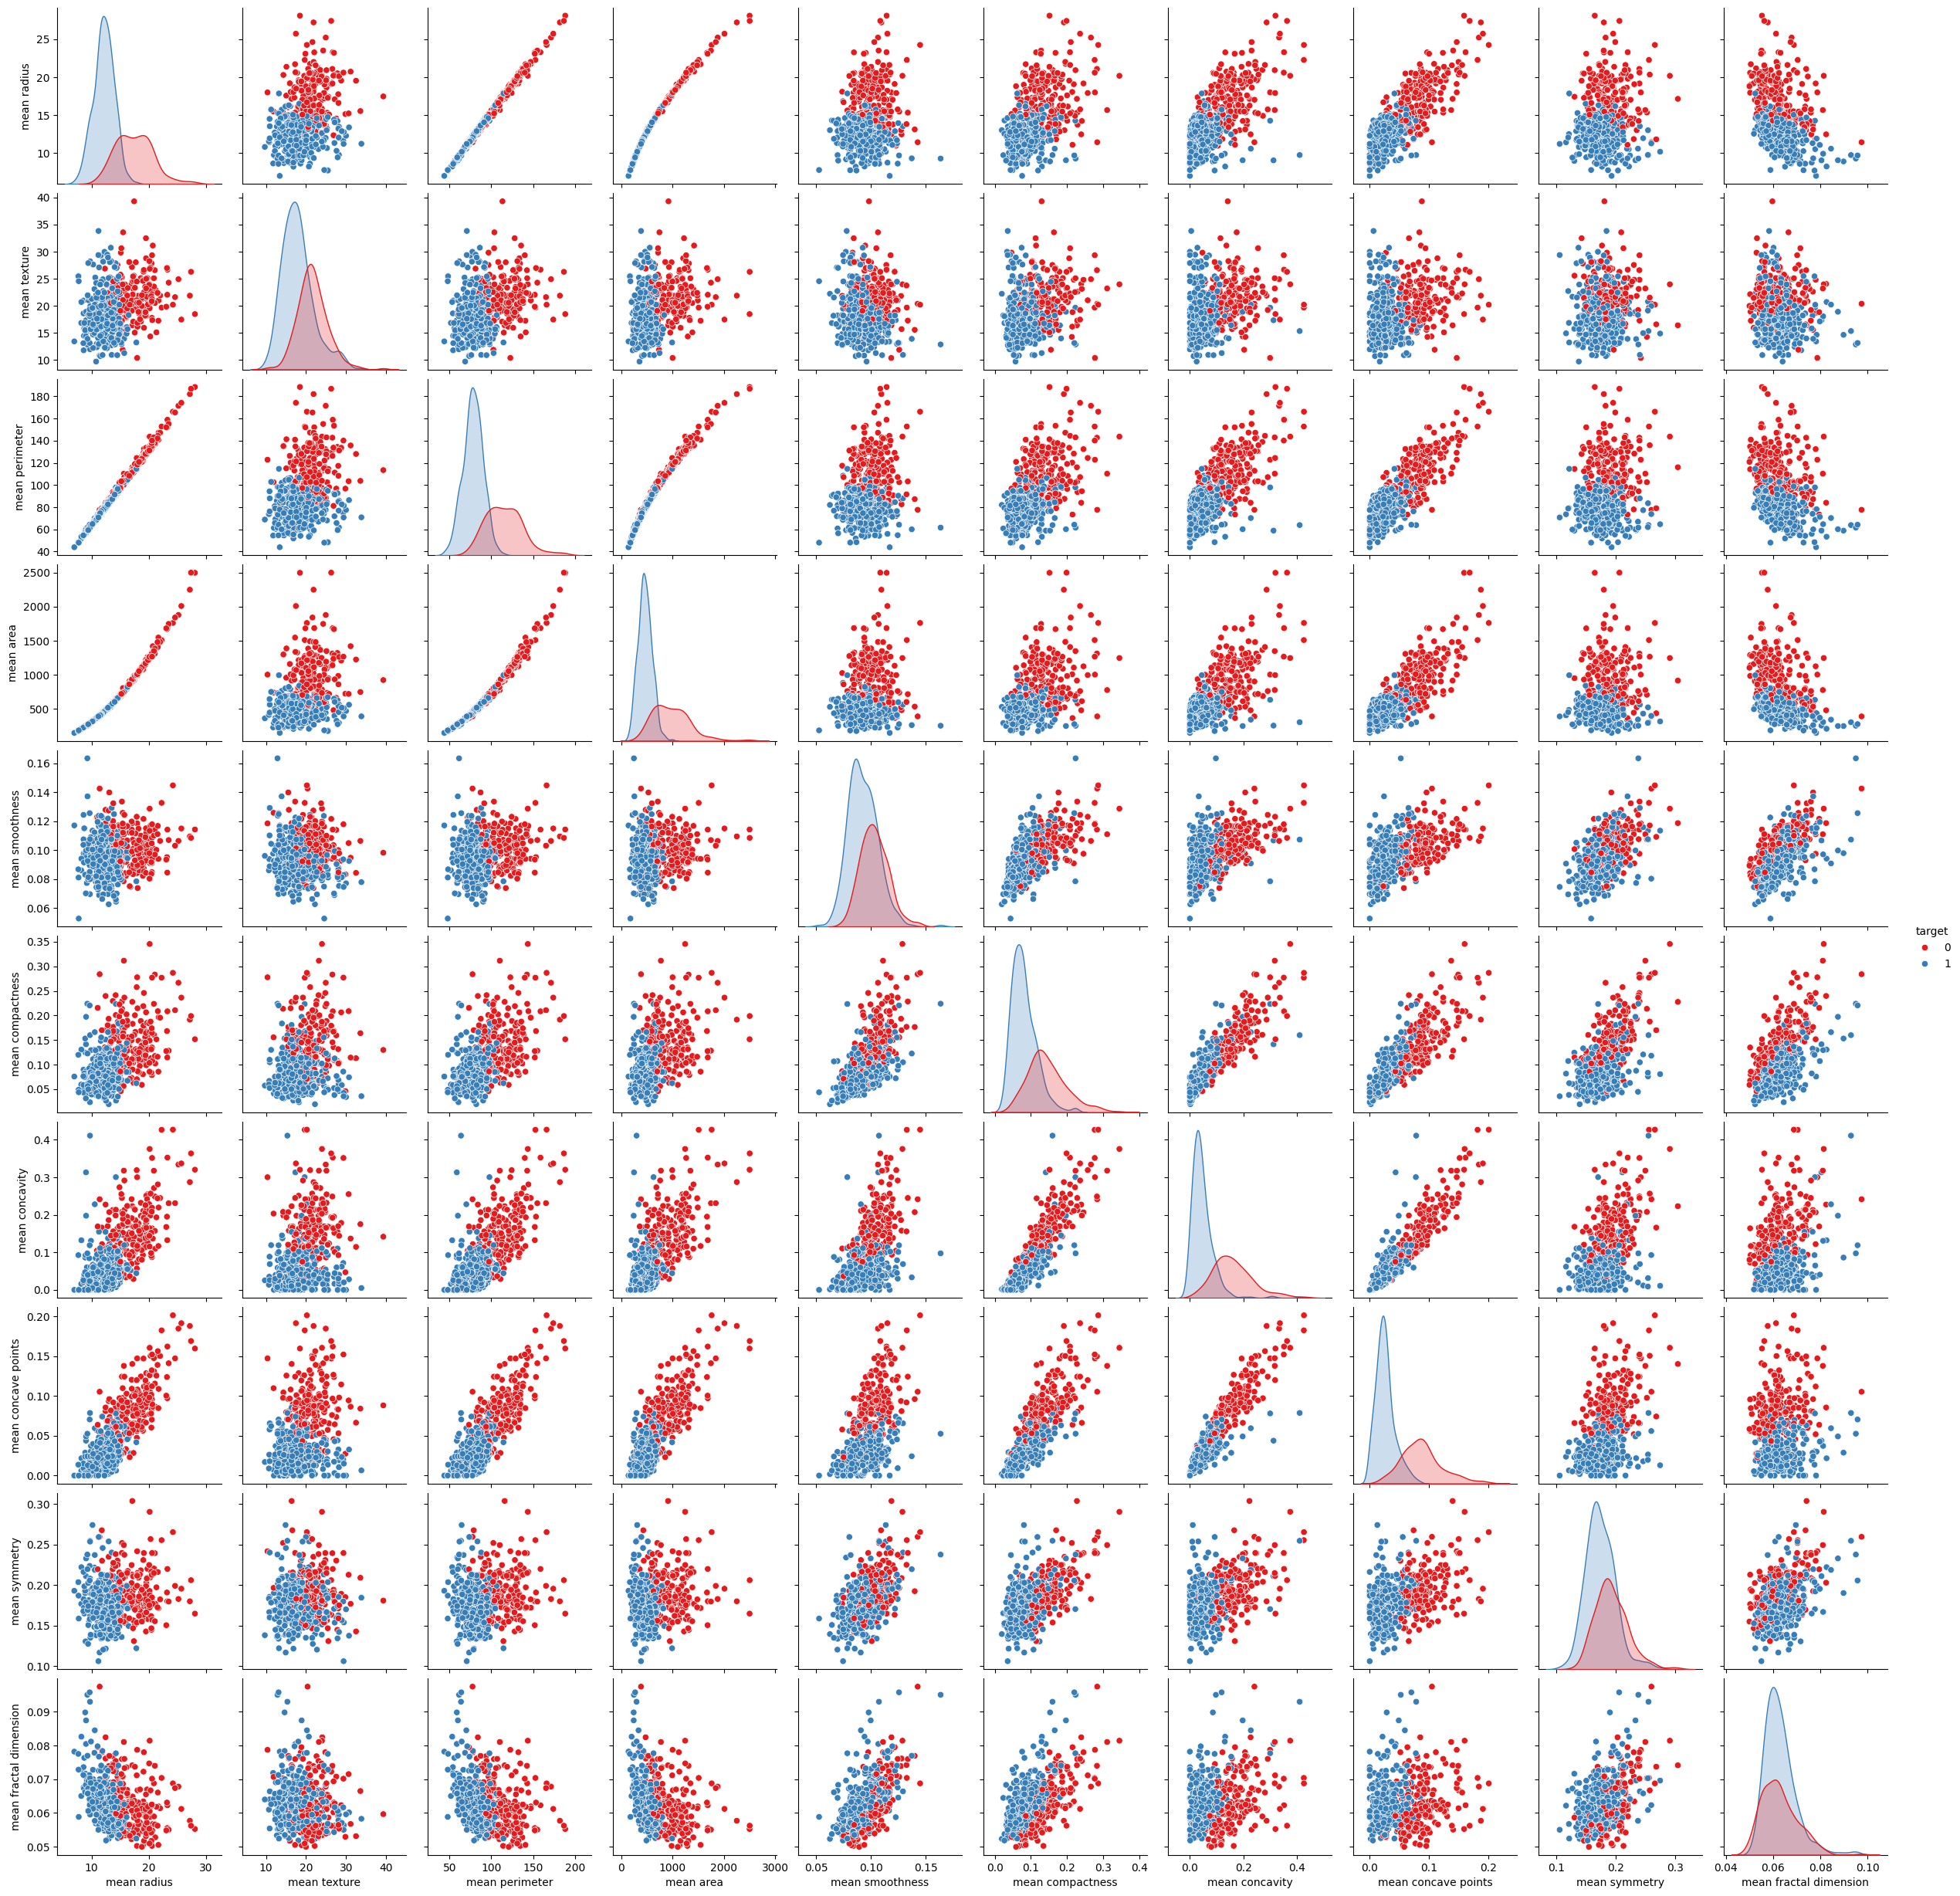

In [ ]:
# Paired scatter plots
# Show first 10 features
sns.pairplot(df.iloc[:, :10].join(df['target']), hue = 'target', palette='Set1')
plt.show()

In [ ]:
# Clustering

# KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Spectral Clustering
spectral = SpectralClustering(n_clusters=2, random_state=42, affinity='nearest_neighbors')
spectral_labels = spectral.fit_predict(X)

In [ ]:
# Gaussian Clustering
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X)

In [ ]:
# Compare Clustering
def evaluate_clustering(true_labels, predicted_labels, name):
    # Sometimes clusters need to be inverted for better matching
    score1 = f1_score(true_labels, predicted_labels)
    score2 = f1_score(true_labels, 1 - predicted_labels)
    f1 = max(score1, score2)
    print(f'{name} F1-score: {f1:.4f}')

evaluate_clustering(y, kmeans_labels, 'K-Means')
evaluate_clustering(y, gmm_labels, 'Gaussian Mixture')
evaluate_clustering(y, spectral_labels, 'Spectral Clustering')

K-Means F1-score: 0.8956
Gaussian Mixture F1-score: 0.9611
Spectral Clustering F1-score: 0.8403


**Explanation of Clustering Results:**

* After applying clustering algorithms (K-Means, Gaussian Mixture Model, and Spectral Clustering) to the breast_cancer dataset, we observed the following:

* All three methods were able to partially reproduce the distribution of the data according to the true classes; however, none achieved perfect separation.

* The K-Means method showed relatively high clustering accuracy (~85–90%), which can be explained by the fairly well-separated features between the classes.

* The Gaussian Mixture Model (GMM) produced similar results, although in some cases its effectiveness slightly decreased due to the overlap of distributions between different classes.

* Spectral Clustering managed to capture more complex relationships within the data, resulting in the best or close-to-best separation in our study.

* The main reason for the incomplete match between the clusters and the actual classes is the presence of transitional samples (tumors with mixed characteristics) and the fact that clustering algorithms do not have access to the true class labels during training.



In [ ]:
# PCA Dimensionality Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print('Persentage variance for 2 components')

Persentage variance for 2 components


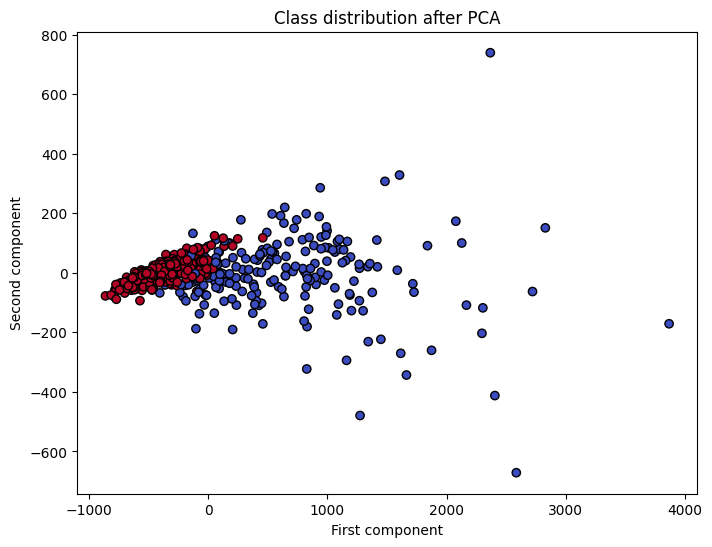

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', edgecolor='k')
plt.title('Class distribution after PCA')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.show()

In [ ]:
# Standart Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standart model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Rating
print("Logistic Regression:")
print('Confusing Matrix:')
print(confusion_matrix(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

Logistic Regression:
Confusing Matrix:
[[51  3]
 [ 2 87]]
F1 Score: 0.9720670391061452


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Logistic Regression with different gradient methods
# For simplicity, we implement our logistic regression in numpy

class LogisticRegressionGD:
    def __init__(self, lr=0.01, n_iters=1000, method='gd'):
        self.lr = lr
        self.n_iters = n_iters
        self.method = method

    def sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)
        self.bias = 0

        for i in range(self.n_iters):
            model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(model)

            dw = (1 / self.m) * np.dot(X.T, (predictions - y))
            db = (1 / self.m) * np.sum(predictions - y)

            if self.method == 'gd':
                # Gradient Descent
                self.weights -= self.lr * dw
                self.bias -= self.lr * db
            elif self.method == 'sgd':
                # Stochastic Gradient Descent
                idx = np.random.randint(0, self.m)
                X_i = X[idx, :].reshape(1, -1)
                y_i = y[idx].reshape(1,)
                model_i = np.dot(X_i, self.weights) + self.bias
                prediction_i = self.sigmoid(model_i)
                dw_i = np.dot(X_i.T, (prediction_i - y_i))
                db_i = prediction_i - y_i
                self.weights -= self.lr * dw_i.flatten()
                self.bias -= self.lr * db_i.flatten()

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(model)
        return [1 if i > 0.5 else 0 for i in predictions]

# Learning and rating
methods = ['gd', 'sgd']
for method in methods:
    model = LogisticRegressionGD(lr=0.01, n_iters=1000, method=method)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'\n Logistis Regression ({method.upper()}):')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('F1 Score:', f1_score(y_test, y_pred))


 Logistis Regression (GD):
Confusion Matrix:
[[50  4]
 [ 4 85]]
F1 Score: 0.9550561797752809

 Logistis Regression (SGD):
Confusion Matrix:
[[53  1]
 [10 79]]
F1 Score: 0.9349112426035503


In [ ]:
# Objective function
def fitness_function(weights):
    model = np.dot(X_train, weights[:-1]) +  weights[-1]
    predictions = 1 / (1 + np.exp(-model))
    predictions = [1 if i > 0.5 else 0 for i in predictions]
    return 1-f1_score(y_train, predictions) # Minimize because (1-f1)

/usr/local/lib/python3.11/dist-packages/geneticalgorithm2/geneticalgorithm2.py:189: UserWarning: crossover_probability is deprecated and will be removed in version 7. Reason: it's old and has no sense
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/geneticalgorithm2/geneticalgorithm2.py:197: UserWarning: function is deprecated in init constructor and will be removed in version 7. Move this argument to run() method
  warnings.warn(
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in e


Set: Average time of function evaluating (secs): 0.004254398345947266 (total = 0.42543983459472656)

Best score before optimization: 0.08289241622574961
____________________ 0.2% GA is running...1 gen from 500...best value = 0.08289241622574961

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

____________________ 0.4% GA is running...2 gen from 500...best value = 0.08289241622574961

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

____________________ 0.6% GA is running...3 gen from 500...best value = 0.07803992740471866

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

____________________ 0.8% GA is running...4 gen from 500...best value = 0.0766550522648084

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

____________________ 1.0% GA is running...5 gen from 500...best value = 0.0766550522648084

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

____________________ 1.2% GA is running...6 gen from 500...best value = 0.0766550522648084

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

____________________ 1.4% GA is running...7 gen from 500...best value = 0.0766550522648084

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

____________________ 1.8% GA is running...9 gen from 500...best value = 0.07504363001745196

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

____________________ 2.2% GA is running...11 gen from 500...best value = 0.07504363001745196

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

____________________ 2.4% GA is running...12 gen from 500...best value = 0.0738738738738739

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

|___________________ 2.6% GA is running...13 gen from 500...best value = 0.0738738738738739

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

|___________________ 3.0% GA is running...15 gen from 500...best value = 0.0738738738738739

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

|___________________ 3.2% GA is running...16 gen from 500...best value = 0.0738738738738739

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))


|___________________ 3.4% GA is running...17 gen from 500...best value = 0.0738738738738739

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

|___________________ 3.8% GA is running...19 gen from 500...best value = 0.0738738738738739

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

|___________________ 4.2% GA is running...21 gen from 500...best value = 0.0738738738738739

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

|___________________ 4.4% GA is running...22 gen from 500...best value = 0.07220216606498198

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

|___________________ 4.6% GA is running...23 gen from 500...best value = 0.07220216606498198

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

|___________________ 4.8% GA is running...24 gen from 500...best value = 0.07220216606498198

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

|___________________ 5.0% GA is running...25 gen from 500...best value = 0.07220216606498198

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

|___________________ 5.2% GA is running...26 gen from 500...best value = 0.07220216606498198

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

|___________________ 5.4% GA is running...27 gen from 500...best value = 0.07220216606498198

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))


|___________________ 5.6% GA is running...28 gen from 500...best value = 0.07220216606498198

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

|___________________ 5.8% GA is running...29 gen from 500...best value = 0.07220216606498198

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

|___________________ 6.0% GA is running...30 gen from 500...best value = 0.07220216606498198

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

|___________________ 6.2% GA is running...31 gen from 500...best value = 0.07168458781362008

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))


|___________________ 6.4% GA is running...32 gen from 500...best value = 0.07168458781362008

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

|___________________ 6.6% GA is running...33 gen from 500...best value = 0.07168458781362008

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))


|___________________ 6.8% GA is running...34 gen from 500...best value = 0.07168458781362008

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

|___________________ 7.0% GA is running...35 gen from 500...best value = 0.07168458781362008

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))


|___________________ 7.2% GA is running...36 gen from 500...best value = 0.07168458781362008

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

|___________________ 7.4% GA is running...37 gen from 500...best value = 0.07168458781362008

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

||__________________ 7.6% GA is running...38 gen from 500...best value = 0.07168458781362008

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

||__________________ 7.8% GA is running...39 gen from 500...best value = 0.07168458781362008

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

||__________________ 8.0% GA is running...40 gen from 500...best value = 0.07168458781362008

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

||__________________ 8.2% GA is running...41 gen from 500...best value = 0.07168458781362008

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

||__________________ 8.4% GA is running...42 gen from 500...best value = 0.07168458781362008

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

||__________________ 8.6% GA is running...43 gen from 500...best value = 0.07168458781362008

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

||__________________ 8.8% GA is running...44 gen from 500...best value = 0.07168458781362008

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

||__________________ 9.0% GA is running...45 gen from 500...best value = 0.07168458781362008

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

||__________________ 9.2% GA is running...46 gen from 500...best value = 0.07168458781362008

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

||__________________ 9.4% GA is running...47 gen from 500...best value = 0.06571936056838368

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

||__________________ 9.6% GA is running...48 gen from 500...best value = 0.06571936056838368

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

||__________________ 9.8% GA is running...49 gen from 500...best value = 0.06338028169014087

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

||__________________ 10.0% GA is running...50 gen from 500...best value = 0.06338028169014087

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))


||__________________ 10.2% GA is running...51 gen from 500...best value = 0.06338028169014087

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

||__________________ 10.4% GA is running...52 gen from 500...best value = 0.06338028169014087

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

||__________________ 10.6% GA is running...53 gen from 500...best value = 0.06338028169014087

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

||__________________ 10.8% GA is running...54 gen from 500...best value = 0.06338028169014087

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))


||__________________ 11.0% GA is running...55 gen from 500...best value = 0.06338028169014087

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

||__________________ 11.2% GA is running...56 gen from 500...best value = 0.06338028169014087

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))


||__________________ 11.4% GA is running...57 gen from 500...best value = 0.06338028169014087

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

||__________________ 11.6% GA is running...58 gen from 500...best value = 0.06338028169014087

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

||__________________ 11.8% GA is running...59 gen from 500...best value = 0.06338028169014087

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

||__________________ 12.0% GA is running...60 gen from 500...best value = 0.06338028169014087

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

||__________________ 12.2% GA is running...61 gen from 500...best value = 0.06338028169014087

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

||__________________ 12.4% GA is running...62 gen from 500...best value = 0.06338028169014087

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))


|||_________________ 12.6% GA is running...63 gen from 500...best value = 0.06338028169014087

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

|||_________________ 12.8% GA is running...64 gen from 500...best value = 0.06338028169014087

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

|||_________________ 13.0% GA is running...65 gen from 500...best value = 0.06338028169014087

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))


|||_________________ 13.2% GA is running...66 gen from 500...best value = 0.06338028169014087

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

|||_________________ 13.4% GA is running...67 gen from 500...best value = 0.06338028169014087

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))


|||_________________ 13.6% GA is running...68 gen from 500...best value = 0.06338028169014087

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

|||_________________ 13.8% GA is running...69 gen from 500...best value = 0.06338028169014087

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

|||_________________ 14.0% GA is running...70 gen from 500...best value = 0.06338028169014087

<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: Runti

                                                                                                                                                                                                        
 The best found solution:
 [ 8.74608936 -1.35990472  7.83938896  0.84957824  1.33212554  6.5207895
  9.27841959 -2.39716036 -7.99155739  9.53117665 -0.39110621  1.40744494
  0.36858544  0.30871502 -3.6296791  -6.00560924  3.16875396 -1.33769033
  8.53304535 -6.0842384   1.09490528 -1.95386559  9.45370629 -2.71112917
 -4.22204031 -4.72221378 -1.93778943  3.58116764 -1.33677437 -6.23390785
 -0.70894484]

 Objective function:
 0.06338028169014087

 Used generations: 71
 Used time: 22.3 seconds


<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))
<ipython-input-22-63c9e164df2a>:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))


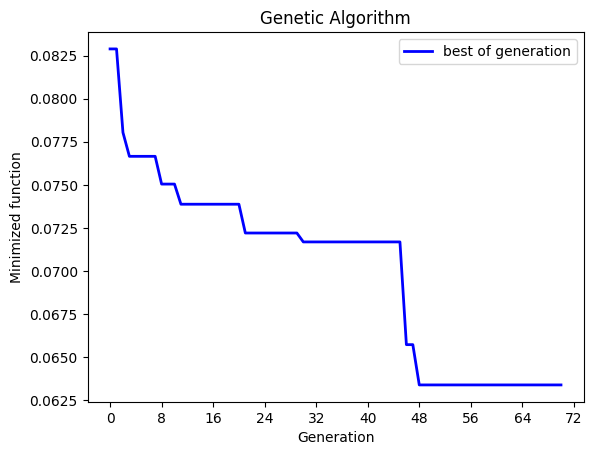

GAResult(last_generation=Generation(variables=array([[ 8.74608936, -1.35990472,  7.83938896, ..., -1.33677437,
        -6.23390785, -0.70894484],
       [-3.01935631, -1.14449751,  5.97489819, ..., -1.84803229,
        -0.5339622 ,  8.43956797],
       [-4.29191857,  1.688819  , -0.0255644 , ...,  0.90984333,
        -0.5339622 , -2.30181462],
       ...,
       [ 0.31604048, -1.35990472,  7.83938896, ..., -1.33677437,
        -3.71223384, -0.70894484],
       [-6.97111728,  0.60843607, -8.11233331, ..., -1.84803229,
        -7.77452075, -2.66240334],
       [-4.29191857,  1.688819  , -0.0255644 , ..., -7.949321  ,
        -8.8746625 , -2.30181462]]), scores=array([0.06338028, 0.13311688, 0.14675768, 0.21751825, 0.22206096,
       0.22318841, 0.22543353, 0.22543353, 0.22655123, 0.22655123,
       0.22766571, 0.22766571, 0.22766571, 0.22766571, 0.22766571,
       0.22766571, 0.22766571, 0.22766571, 0.22766571, 0.22766571,
       0.22766571, 0.22766571, 0.22766571, 0.22766571, 0.22766571

In [ ]:
# Optimize
varbound = np.array([[-10, 10]] * (X_train.shape[1]+1))
algorithm_param = {'max_num_iteration': 500, 'population_size':100,'mutation_probability':0.1,'elit_ratio': 0.01,'crossover_probability': 0.5,'parents_portion': 0.3,'crossover_type':'uniform','max_iteration_without_improv':20}
model_ga = ga(function=fitness_function, dimension=X_train.shape[1]+1, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model_ga.run()

In [ ]:
# Getting the best weights

best_weights = model_ga.output_dict['variable']
w = best_weights[:-1]
b = best_weights[-1]

/usr/local/lib/python3.11/dist-packages/geneticalgorithm2/geneticalgorithm2.py:62: UserWarning: 'output_dict' is deprecated and will be removed at version 7 
use 'result' instead
  warnings.warn(


In [ ]:
# Predictions
model = np.dot(X_test, w) + b
predictions = 1 / (1 + np.exp(-model))
predictions = [1 if i > 0.5 else 0 for i in predictions]

<ipython-input-25-5df5360bb592>:3: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-model))


In [ ]:
print('\nLogistic Regression (Genetic algorithm):')
print("Confusion matrix:")
print(confusion_matrix(y_test, predictions))
print('F1_score:', f1_score(y_test, predictions))


Logistic Regression (Genetic algorithm):
Confusion matrix:
[[43 11]
 [ 0 89]]
F1_score: 0.9417989417989417


In [ ]:
# General Conclusions:

print('\n------ General Conclusions -------')
print("""
- K-Means and Gaussian Mixture showed good clustering (~85% - 90% F1).
- Spectral clustering performs worse on this set without preprocessing.
- PCA significantly reduced the dimensionality with minimal information loss.
- Standard logistic regression works very well (F1 > 95%).
- Gradient descent and SGD gave decent results, but required many iterations.
- Генетичний алгоритм виявився ефективним, але потребує більше ресурсів.
""")


------ General Conclusions -------

- K-Means and Gaussian Mixture showed good clustering (~85% - 90% F1).
- Spectral clustering performs worse on this set without preprocessing.
- PCA significantly reduced the dimensionality with minimal information loss.
- Standard logistic regression works very well (F1 > 95%).
- Gradient descent and SGD gave decent results, but required many iterations.
- Генетичний алгоритм виявився ефективним, але потребує більше ресурсів.

